In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# test = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/raw/HSTMachineError.csv')
# test.head()

test = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
test[test['MerNumber'] == 98]

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
11,11,2025-01-30 10:22:16,11897198,22,98,12,2.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,22_98_0.0_0.0,NaN,1,0 days 00:04:02
18,18,2025-01-30 10:22:36,11897208,23,98,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_98_0.0_0.0,NaN,1,0 days 00:04:02
21,21,2025-01-30 10:22:50,11897213,22,98,12,2.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,22_98_0.0_0.0,NaN,1,0 days 00:04:02
25,25,2025-01-30 10:23:08,11897217,22,98,7,2.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,22_98_0.0_0.0,NaN,1,0 days 00:04:02
26,26,2025-01-30 10:23:17,11897221,22,98,16,4.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,22_98_0.0_0.0,NaN,1,0 days 00:04:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862372,1862372,2025-04-08 20:11:57,14027687,22,98,11,1.0,0.0,0.0,0.0,0.0,4620,NaN,1,0,0,22_98_0.0_0.0,NaN,24804,0 days 00:04:50
1862374,1862374,2025-04-08 20:11:57,14027689,22,98,9,1.0,0.0,0.0,0.0,0.0,4620,NaN,1,0,0,22_98_0.0_0.0,NaN,24804,0 days 00:04:50
1862375,1862375,2025-04-08 20:11:58,14027690,22,98,8,1.0,0.0,0.0,0.0,0.0,4620,NaN,1,0,0,22_98_0.0_0.0,NaN,24804,0 days 00:04:50
1862376,1862376,2025-04-08 20:11:58,14027691,22,98,7,1.0,0.0,0.0,0.0,0.0,4620,NaN,1,0,0,22_98_0.0_0.0,NaN,24804,0 days 00:04:50


Removing weekends

In [183]:
# Convert MerDateDay to datetime if not already done
test['MerDate'] = pd.to_datetime(test['MerDate'] )

# Filter out weekend dates (Saturday and Sunday)
test = test[~test['MerDate'].dt.weekday.isin([5, 6])]

What types of lane errors typically occur in the machine, and what are their causes? (identify error types and their frequency)

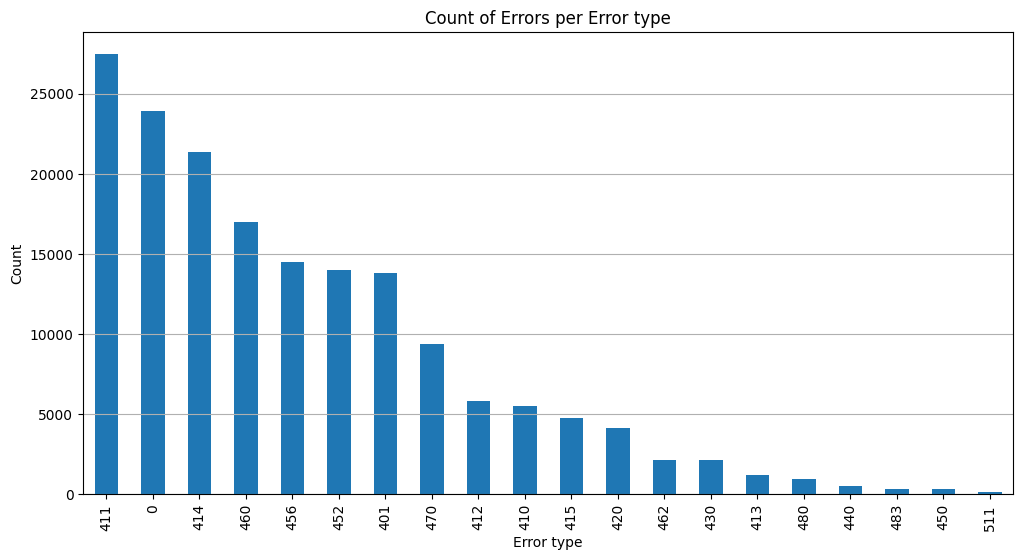

In [172]:
eda = test[(test['MerType'] == 21) &(test['MerNumber'] >= 400) | ((test['MerType'] == 8) & (test['MerNumber'] == 0)) ]
# eda['MerNumber'].value_counts()
# Create a bar chart for the count of occurrences per MerNumber
eda['MerNumber'].value_counts().plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Error type')
plt.ylabel('Count')
plt.title('Count of Errors per Error type')
plt.grid(axis='y')
# Save the plot as a picture
plt.savefig('error_type_count_plot.jpg')
plt.show()


What are the most common errors per day?

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/2428224869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda['MerDateDay'] = eda['MerDate'].dt.date
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/2428224869.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eda_agg = eda.groupby('MerDateDay').apply(


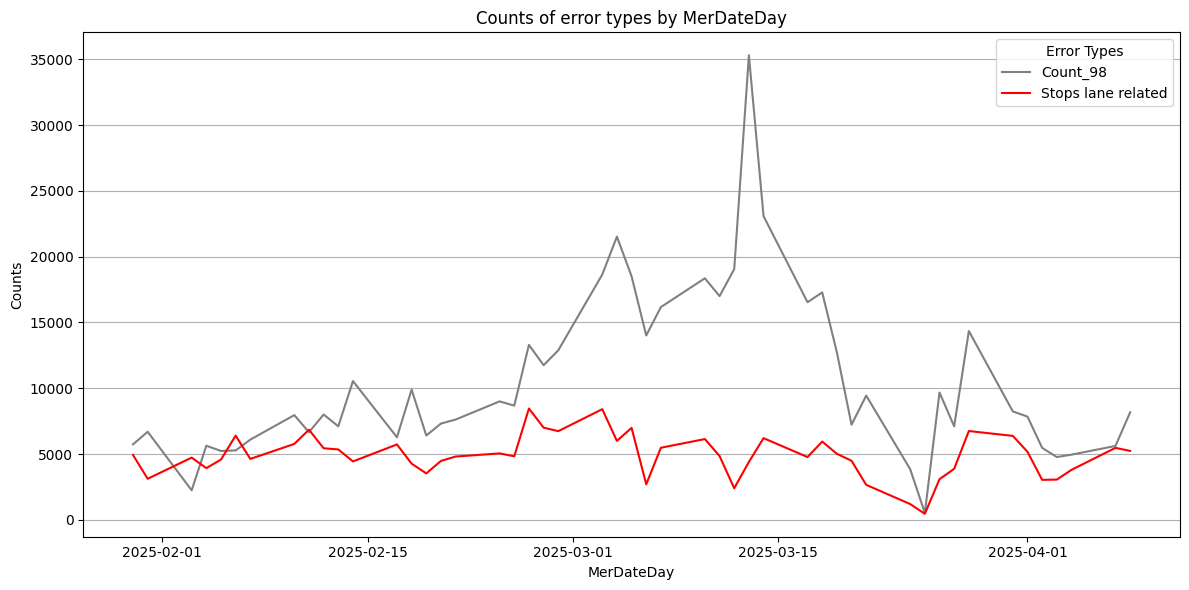

In [197]:
eda = test[(test['MerType'] == 21) &(test['MerNumber'] >= 400) | ((test['MerType'] == 8) & (test['MerNumber'] == 0)) | ((test['MerType'] == 22) & (test['MerNumber'] == 98))]

eda['MerDateDay'] = eda['MerDate'].dt.date
eda_agg = eda.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Count_411': (x['MerNumber'] == 411).sum(),
        'Count_414': (x['MerNumber'] == 414).sum(),
        'Count_460': (x['MerNumber'] == 460).sum(),
        'Count_456': (x['MerNumber'] == 456).sum(),
        'Count_452': (x['MerNumber'] == 452).sum(),
        'Count_401': (x['MerNumber'] == 401).sum(),
        'Count_98': (x['MerNumber'] == 98).sum(),
        # 'Count_470': (x['MerNumber'] == 470).sum(),
        # 'Count_412': (x['MerNumber'] == 412).sum(),
        # 'Count_410': (x['MerNumber'] == 410).sum(),
        # 'Count_415': (x['MerNumber'] == 415).sum(),
        # 'Count_420': (x['MerNumber'] == 420).sum(),
        # 'Count_462': (x['MerNumber'] == 462).sum(),
        # 'Count_430': (x['MerNumber'] == 430).sum(),
        # 'Count_413': (x['MerNumber'] == 413).sum(),
        # 'Count_480': (x['MerNumber'] == 480).sum(),
        # 'Count_440': (x['MerNumber'] == 440).sum(),
        # 'Count_483': (x['MerNumber'] == 483).sum(),
        # 'Count_450': (x['MerNumber'] == 450).sum(),
        # 'Count_511': (x['MerNumber'] == 511).sum(),
        'Stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum() * 10 

        # 'Stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum() * 10 #we only want lane related errors MerSubNumber 2 is lane related
    })
).reset_index()

# eda_agg = eda_agg[eda_agg['MerDateDay'].apply(lambda x: pd.to_datetime(x).month).isin([1, 2])]

eda_agg.plot(
    x='MerDateDay', 
    y=['Count_98', 'Stops lane related'], 

    # y=['Count_411', 'Count_414', 'Count_460', 'Count_456', 'Count_452', 'Count_401', 'Count_98', 'Stops lane related'], 
    kind='line', 
    figsize=(12, 6),
    color=['grey', 'red']

    # color=['#A9A9A9', '#708090', '#5F9EA0', '#4682B4', '#4169E1', '#0000FF', 'grey', 'red']
)

# Add labels, title, and legend
plt.xlabel('MerDateDay')
plt.ylabel('Counts')
plt.title('Counts of error types by MerDateDay')
plt.legend(title='Error Types')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/2220362728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda['MerDateDay'] = eda['MerDate'].dt.date
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/2220362728.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eda_agg = eda.groupby('MerDateDay').apply(


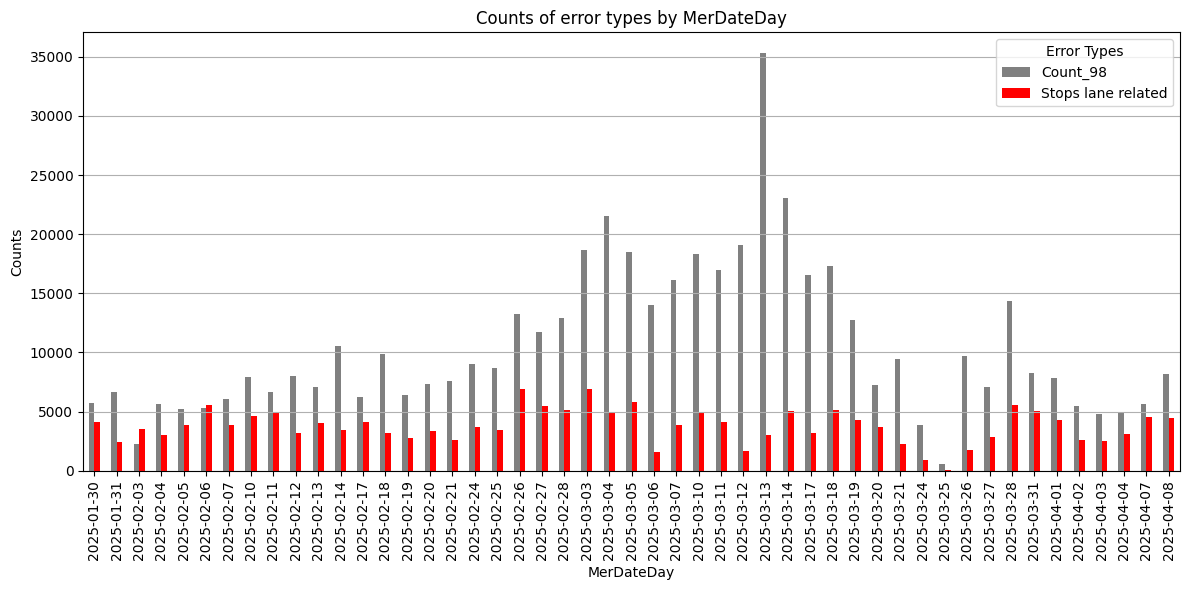

In [193]:
eda = test[(test['MerType'] == 21) &(test['MerNumber'] >= 400) | ((test['MerType'] == 8) & (test['MerNumber'] == 0)) | ((test['MerType'] == 22) & (test['MerNumber'] == 98))]

eda['MerDateDay'] = eda['MerDate'].dt.date
eda_agg = eda.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Count_411': (x['MerNumber'] == 411).sum(),
        'Count_414': (x['MerNumber'] == 414).sum(),
        'Count_460': (x['MerNumber'] == 460).sum(),
        'Count_456': (x['MerNumber'] == 456).sum(),
        'Count_452': (x['MerNumber'] == 452).sum(),
        'Count_401': (x['MerNumber'] == 401).sum(),
        'Count_98': (x['MerNumber'] == 98).sum(),
        # 'Count_470': (x['MerNumber'] == 470).sum(),
        # 'Count_412': (x['MerNumber'] == 412).sum(),
        # 'Count_410': (x['MerNumber'] == 410).sum(),
        # 'Count_415': (x['MerNumber'] == 415).sum(),
        # 'Count_420': (x['MerNumber'] == 420).sum(),
        # 'Count_462': (x['MerNumber'] == 462).sum(),
        # 'Count_430': (x['MerNumber'] == 430).sum(),
        # 'Count_413': (x['MerNumber'] == 413).sum(),
        # 'Count_480': (x['MerNumber'] == 480).sum(),
        # 'Count_440': (x['MerNumber'] == 440).sum(),
        # 'Count_483': (x['MerNumber'] == 483).sum(),
        # 'Count_450': (x['MerNumber'] == 450).sum(),
        # 'Count_511': (x['MerNumber'] == 511).sum(),
        'Stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum() * 10 #we only want lane related errors MerSubNumber 2 is lane related
    })
).reset_index()

# eda_agg = eda_agg[eda_agg['MerDateDay'].apply(lambda x: pd.to_datetime(x).month).isin([1, 2])]

eda_agg.plot(
    x='MerDateDay', 
    y=['Count_98', 'Stops lane related'], 

    # y=['Count_411', 'Count_414', 'Count_460', 'Count_456', 'Count_452', 'Count_401', 'Count_98', 'Stops lane related'], 
    kind='bar', 
    figsize=(12, 6),
    color=['grey', 'red']

    # color=['#A9A9A9', '#708090', '#5F9EA0', '#4682B4', '#4169E1', '#0000FF', 'grey', 'red']
)

# Add labels, title, and legend
plt.xlabel('MerDateDay')
plt.ylabel('Counts')
plt.title('Counts of error types by MerDateDay')
plt.legend(title='Error Types')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

What type of setting changes happen?

In [149]:
data1= test[test['MerType'] == 15]
data1['MerNumber'].value_counts()

MerNumber
11     34265
1      29364
250     6545
243     6105
241     1727
242      289
253      279
Name: count, dtype: int64

Aggregate data  by day

In [71]:
# Convert MerDate to datetime if not already done
test['MerDate'] = pd.to_datetime(test['MerDate'])

# Extract the date part from MerDate
test['MerDateDay'] = test['MerDate'].dt.date

# Aggregate data by day and count the specified values of MerType
aggregated_data = test.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total errors': (x['MerType'] == 21).sum(),
        'Total warnings': (x['MerType'] == 23).sum(),
        'Total settings changed': (x['MerType'] == 15).sum(),
        'Total stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum(), #we only want lane related errors MerSubNumber 2 is lane related
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
).reset_index()

aggregated_data.head(5)

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/251424520.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = test.groupby('MerDateDay').apply(


,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
0,2025-01-30,2983,10999,862,413,493
1,2025-01-31,2618,12839,1366,247,312
2,2025-02-01,0,1,0,0,0
3,2025-02-02,38,39,0,0,0
4,2025-02-03,3462,7481,1264,356,473


In [72]:
aggregated_data.describe()

,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2804.647059,12877.279412,1190.205882,282.838235,364.764706
std,1858.066687,9754.092765,794.288540,205.735420,254.793690
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,799.250000,1040.000000,153.000000,1.500000,37.000000
50%,3226.000000,13469.000000,1518.500000,319.500000,446.000000
75%,4071.000000,18866.000000,1757.000000,436.000000,547.250000
max,6632.000000,41844.000000,3338.000000,689.000000,846.000000


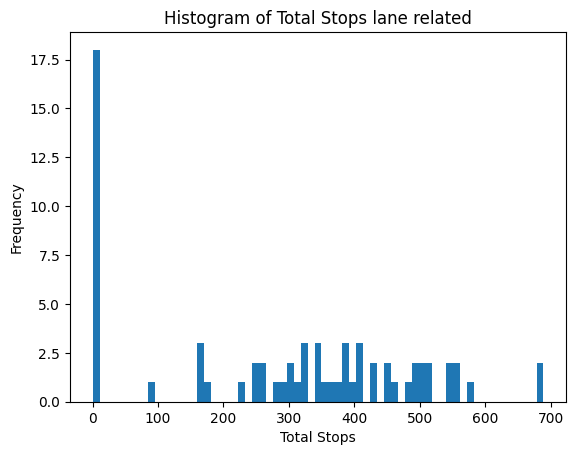

In [73]:
plt.hist(aggregated_data['Total stops lane related'], bins=65)
plt.title('Histogram of Total Stops lane related')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

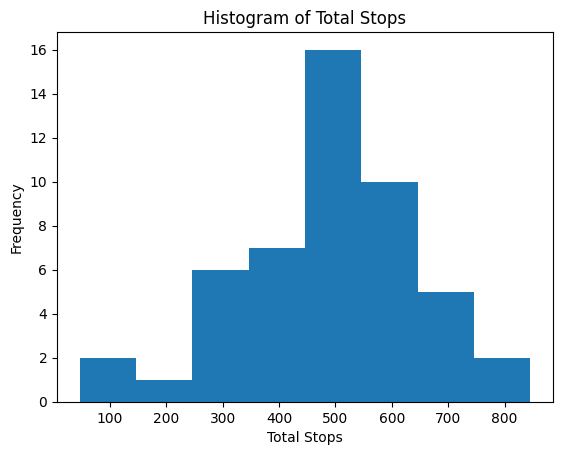

In [74]:
plt.hist(filtered_data['Total stops'], bins=8)
plt.title('Histogram of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

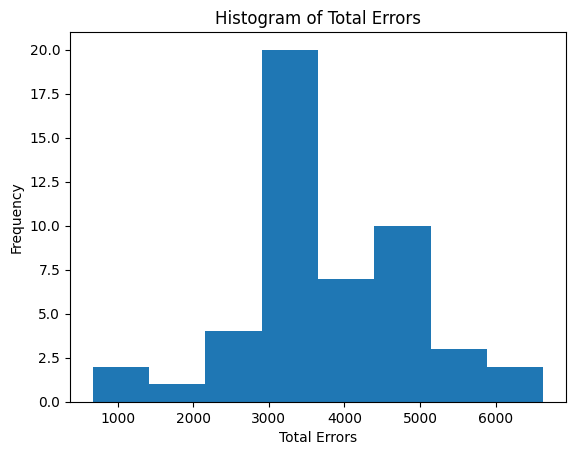

In [75]:
plt.hist(filtered_data['Total errors'], bins=8)
plt.title('Histogram of Total Errors')
plt.xlabel('Total Errors')
plt.ylabel('Frequency')
plt.show()

Removing weekends

In [76]:
# Convert MerDateDay to datetime if not already done
aggregated_data['MerDateDay'] = pd.to_datetime(aggregated_data['MerDateDay'])

# Filter out weekend dates (Saturday and Sunday)
filtered_data = aggregated_data[~aggregated_data['MerDateDay'].dt.weekday.isin([5, 6])]

filtered_data.head()

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
0,2025-01-30,2983,10999,862,413,493
1,2025-01-31,2618,12839,1366,247,312
4,2025-02-03,3462,7481,1264,356,473
5,2025-02-04,3588,12289,1361,301,393
6,2025-02-05,3618,11115,1127,385,458


In [77]:
filtered_data[filtered_data['Total errors'] < 1000]

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
52,2025-03-24,977,6546,550,88,120
53,2025-03-25,668,1120,202,2,46


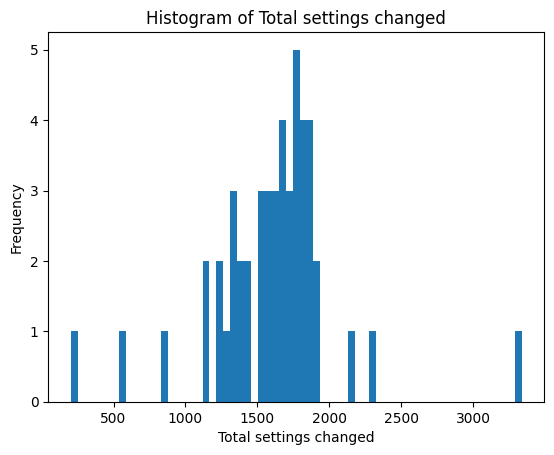

In [80]:
plt.hist(filtered_data['Total settings changed'], bins=65)
plt.title('Histogram of Total settings changed')
plt.xlabel('Total settings changed')
plt.ylabel('Frequency')
plt.show()

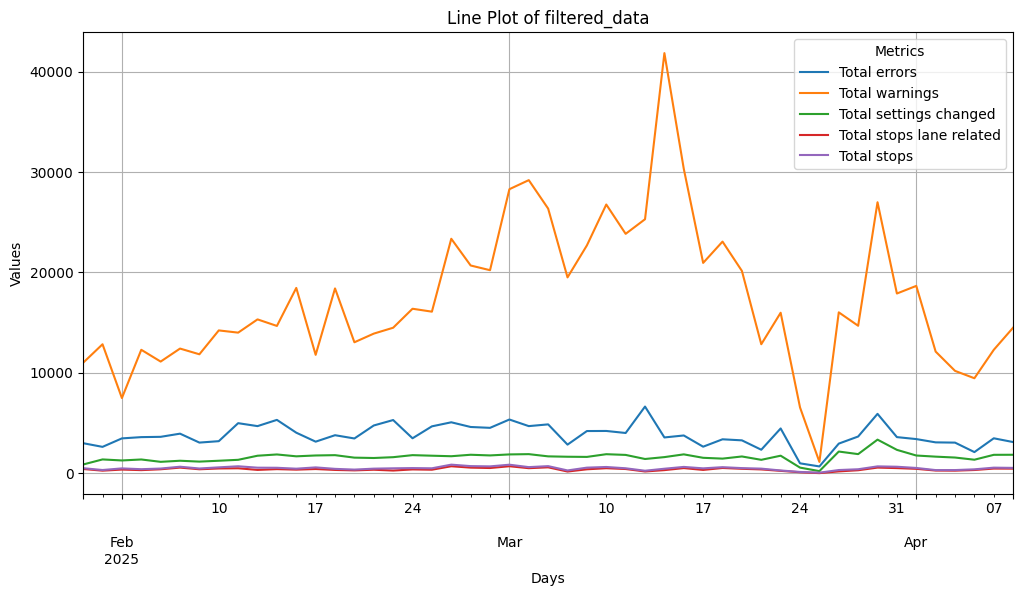

In [87]:
# Plot a line for each column in the DataFrame
filtered_data.plot(x='MerDateDay', y=['Total errors', 'Total warnings', 'Total settings changed', 'Total stops lane related', 'Total stops'], kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Line Plot of filtered_data')
plt.legend(title='Metrics')
plt.grid(True)
plt.show()

In [92]:
filtered_data[filtered_data['MerDateDay'] == '2025-03-26']

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
54,2025-03-26,2942,16019,2152,175,309


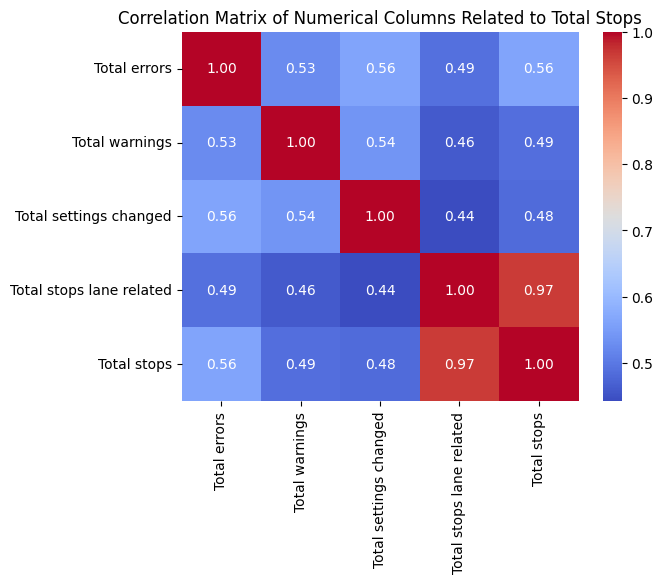

In [94]:
# Select numerical columns related to 'Total stops'
numerical_columns = ['Total errors', 'Total warnings', 'Total settings changed', 'Total stops lane related', 'Total stops']

# Compute the correlation matrix
correlation_matrix = filtered_data[numerical_columns].corr()

# Optionally, visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns Related to Total Stops')
plt.show()

In [95]:
snapshots = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
snapshots.head()

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02


In [125]:
# Filter data for error code 21 and MerNumber > 400
filtered_errors = snapshots[(snapshots['MerType'] == 21) & (snapshots['MerNumber'] > 400)]

# Create a new column for each lane and count occurrences
lane_error_counts = filtered_errors.groupby(['snapshot', 'MerSubNumber']).size().unstack(fill_value=0)

# Merge the lane error counts back into the snapshots DataFrame
snapshots_with_lane_errors = snapshots.merge(lane_error_counts, how='left', on='snapshot').fillna(0)

# Rename columns to indicate lane-specific error counts
snapshots_with_lane_errors.rename(columns=lambda x: f"Lane_{int(x)}_Error21_Count" if isinstance(x, int) else x, inplace=True)

snapshots_with_lane_errors.head()

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,...,Lane_9_Error21_Count,Lane_10_Error21_Count,Lane_11_Error21_Count,Lane_12_Error21_Count,Lane_13_Error21_Count,Lane_14_Error21_Count,Lane_15_Error21_Count,Lane_16_Error21_Count,Lane_17_Error21_Count,Lane_18_Error21_Count
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0


In [132]:
lane_error_counts = lane_error_counts.reset_index()
# lane_error_counts.head()
lane_error_counts.iloc[:, 1:19] = lane_error_counts.iloc[:, 1:19].applymap(lambda x: x if x <= 45 else 45)
lane_error_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16882 entries, 0 to 16881
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   level_0   16882 non-null  int64
 1   index     16882 non-null  int64
 2   snapshot  16882 non-null  int64
 3   1         16882 non-null  int64
 4   2         16882 non-null  int64
 5   3         16882 non-null  int64
 6   4         16882 non-null  int64
 7   5         16882 non-null  int64
 8   6         16882 non-null  int64
 9   7         16882 non-null  int64
 10  8         16882 non-null  int64
 11  9         16882 non-null  int64
 12  10        16882 non-null  int64
 13  11        16882 non-null  int64
 14  12        16882 non-null  int64
 15  13        16882 non-null  int64
 16  14        16882 non-null  int64
 17  15        16882 non-null  int64
 18  16        16882 non-null  int64
 19  17        16882 non-null  int64
 20  18        16882 non-null  int64
dtypes: int64(21)
memory usage: 2.7 MB


/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/856811193.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lane_error_counts.iloc[:, 1:19] = lane_error_counts.iloc[:, 1:19].applymap(lambda x: x if x <= 45 else 45)


In [134]:
print(lane_error_counts.columns.tolist())

['level_0', 'index', 'snapshot', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


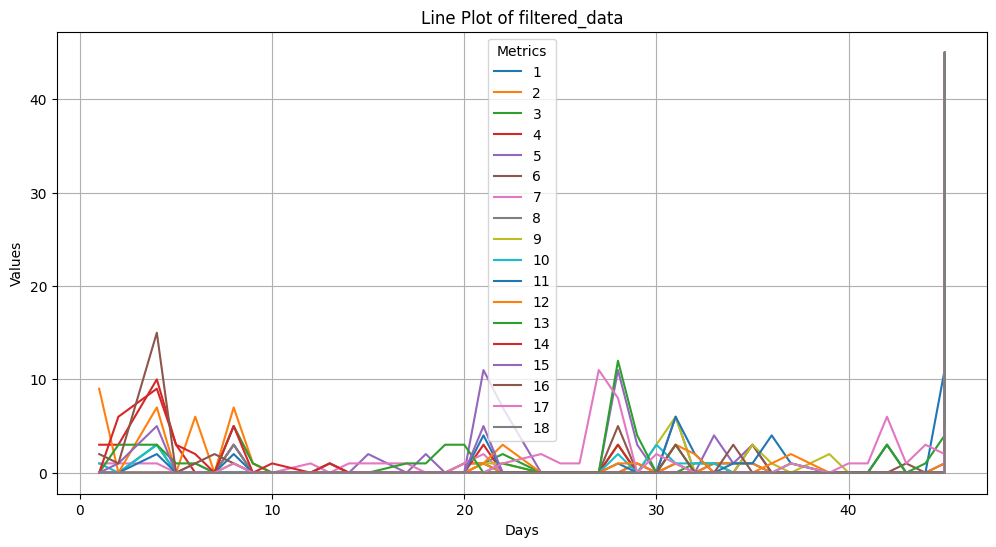

In [135]:
# Plot a line for each column in the DataFrame
lane_error_counts.plot(x='snapshot', y=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Line Plot of filtered_data')
plt.legend(title='Metrics')
plt.grid(True)
plt.show()

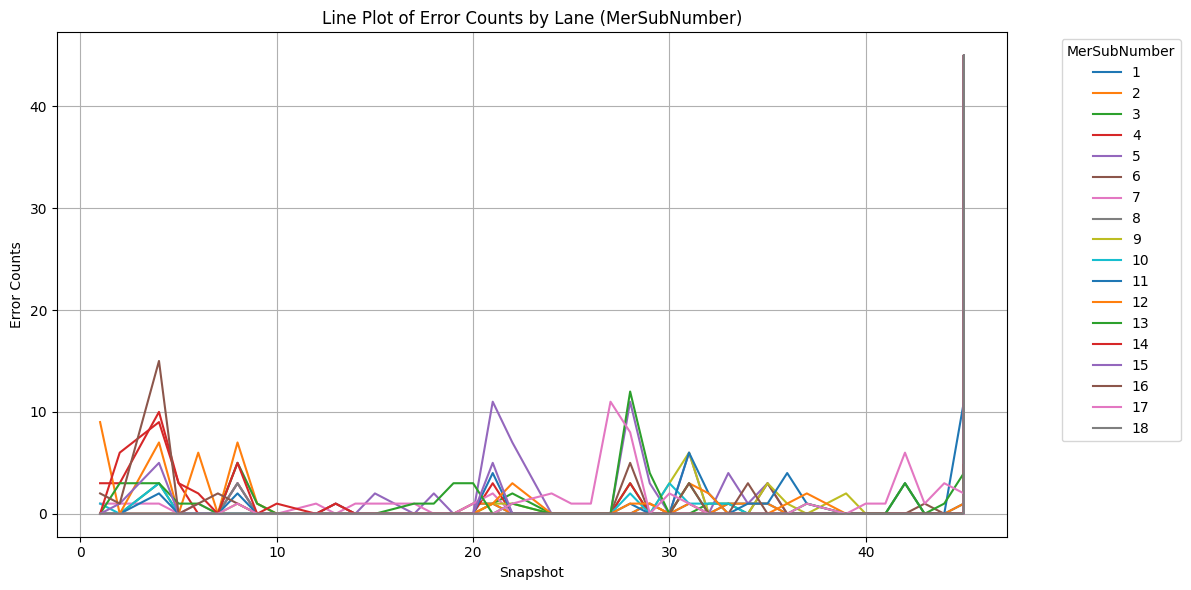

In [136]:
lane_error_counts.plot(x='snapshot', y=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Snapshot')
plt.ylabel('Error Counts')
plt.title('Line Plot of Error Counts by Lane (MerSubNumber)')
plt.legend(title='MerSubNumber', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# Filter rows where any lane error count is greater than 50
high_lane_errors = lane_error_counts[(lane_error_counts < 40).any(axis=1)]

high_lane_errors

MerSubNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
snapshot,,,,,,,,,,,,,,,,,,
1,0,0,0,3,0,0,1,0,0,1,0,9,0,0,0,2,0,0
2,0,0,0,3,0,0,1,0,0,0,0,0,3,6,1,1,0,0
4,0,0,3,10,0,0,1,0,0,3,2,7,3,9,5,15,0,0
5,0,0,0,3,0,0,0,0,0,0,0,0,1,3,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,6,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24795,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
24803,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
high_lane_errors[(high_lane_errors > 40).any(axis=1)]

MerSubNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
snapshot,,,,,,,,,,,,,,,,,,
803,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,4,2,0
806,7,6,32,41,30,37,36,32,35,33,37,33,32,31,33,31,31,31
5271,1,1,16,4,17,3,1,0,16,4,11,8,0,0,0,0,48,0
5572,18,18,43,44,44,41,41,41,42,43,42,43,42,41,43,42,41,44
5971,55,55,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0
7602,33,32,32,32,85,85,85,85,92,90,110,91,91,91,91,91,90,91
13008,70,70,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,1
13884,7,7,40,22,42,25,30,30,39,30,28,28,28,38,29,30,33,28
14706,3,3,32,35,51,51,54,51,52,55,55,52,52,52,52,52,53,52


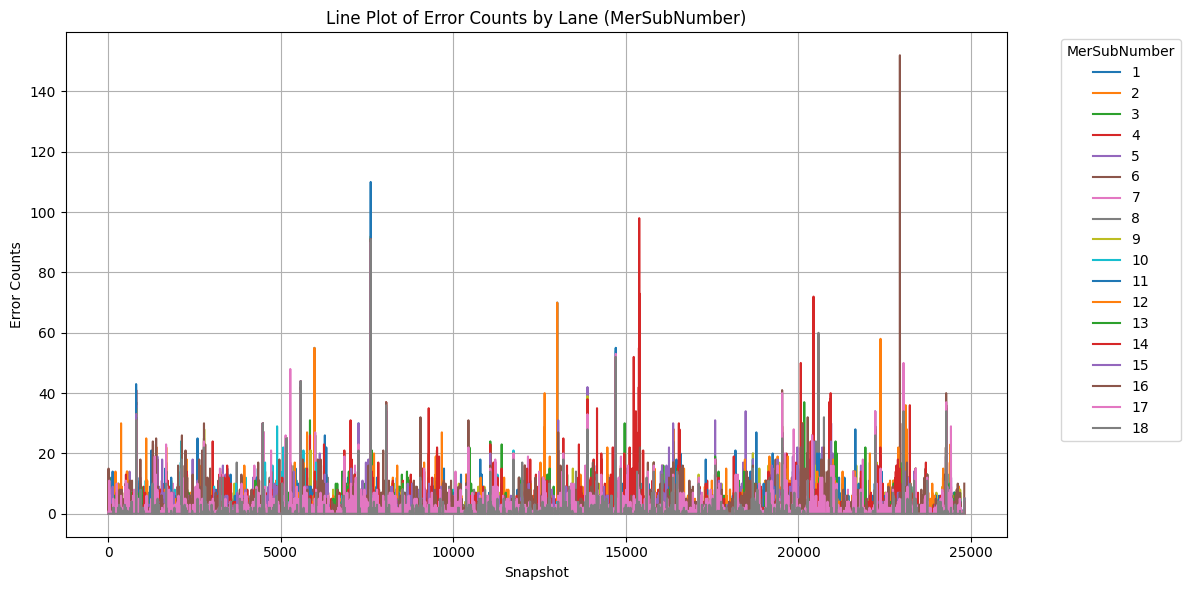

In [106]:
high_lane_errors.plot(kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Snapshot')
plt.ylabel('Error Counts')
plt.title('Line Plot of Error Counts by Lane (MerSubNumber)')
plt.legend(title='MerSubNumber', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()